In [53]:
import pandas as pd
import glob
import re
import scipy.stats as ss

In [54]:
fns = glob.glob('/data/odc/derivatives/laminar_analysis/sub-*/ses-*/func/sub-*_ses-*_desc-psc.pkl')

In [55]:
reg = re.compile(r'.*/sub-(?P<subject>[a-z]+)_ses-(?P<session>[a-z0-9]+)_desc-psc\.pkl')

In [60]:
results = []

for fn in fns:
    print(fn)
    meta = reg.match(fn).groupdict()
    
    d = pd.read_pickle(fn)
    
    t, p =ss.ttest_rel(d.loc[(slice(None), 'left'), 'psc'], d.loc[(slice(None), 'right'), 'psc'])
    
    d = d['psc'].T.set_index(pd.Series(t, name='t'), append=True).T
           
    results.append(pd.concat([d.loc[:, p < 0.05]], keys=[(meta['subject'], meta['session'])], names=['subject', 'session']))
    print(d.loc[:, p < 0.05].shape)

df = pd.concat(results)

/data/odc/derivatives/laminar_analysis/sub-bm/ses-odc/func/sub-bm_ses-odc_desc-psc.pkl


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


(16, 7113)
/data/odc/derivatives/laminar_analysis/sub-de/ses-odc1/func/sub-de_ses-odc1_desc-psc.pkl


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


(16, 4551)
/data/odc/derivatives/laminar_analysis/sub-eo/ses-odc/func/sub-eo_ses-odc_desc-psc.pkl


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


(20, 4027)
/data/odc/derivatives/laminar_analysis/sub-ms/ses-odc2/func/sub-ms_ses-odc2_desc-psc.pkl


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


(14, 1992)
/data/odc/derivatives/laminar_analysis/sub-ns/ses-odc/func/sub-ns_ses-odc_desc-psc.pkl


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


(16, 2918)
/data/odc/derivatives/laminar_analysis/sub-tk/ses-odc2/func/sub-tk_ses-odc2_desc-psc.pkl


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


(20, 3726)
/data/odc/derivatives/laminar_analysis/sub-tk/ses-odc3/func/sub-tk_ses-odc3_desc-psc.pkl


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


(20, 3758)
/data/odc/derivatives/laminar_analysis/sub-tr/ses-odc/func/sub-tr_ses-odc_desc-psc.pkl


/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]
/Users/gdehol/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


(16, 5873)


In [58]:
df.groupby(['subject', 'session']).apply(lambda d: ~(d.isnull()).sum())

mask                  V1l                                                    \
voxel               1         2         3                   4                 
depth            0.933467  0.841109  0.829915  0.974334  0.017858  0.829303   
t                2.634244 -3.346949 -6.985038 -2.461321  2.369925 -5.040360   
subject session                                                               
bm      odc            -1        -1        -1       -17       -17        -1   
de      odc1          -17       -17       -17       -17       -17       -17   
eo      odc           -21       -21       -21       -21       -21       -21   
ms      odc2          -15       -15       -15        -1       -15       -15   
ns      odc           -17       -17       -17       -17       -17       -17   
tk      odc2          -21       -21       -21       -21       -21       -21   
        odc3          -21       -21       -21       -21       -21       -21   
tr      odc           -17       -17       -17       -17        -1       -17   

mask                                                     ...       V1r  \
voxel               5                   6         7      ...     22997   
depth            0.078260  0.824092  0.800928  0.088016  ...  0.663892   
t               -2.549740  3.648918  5.735759 -2.446524  ... -3.632495   
subject session                                          ...             
bm      odc           -17        -1        -1       -17  ...       -17   
de      odc1          -17       -17       -17       -17  ...       -17   
eo      odc           -21       -21       -21       -21  ...       -21   
ms      odc2          -15       -15       -15       -15  ...       -15   
ns      odc           -17       -17       -17       -17  ...       -17   
tk      odc2          -21       -21       -21       -21  ...       -21   
        odc3          -21       -21       -21       -21  ...       -21   
tr      odc            -1       -17       -17        -1  ...        -1   

mask                                                                         \
voxel               23000     23063     23064     23110     23111     23134   
depth            0.007766  0.254053  0.214759  0.748228  0.627484  0.844055   
t                2.485123 -4.565762 -3.417627 -4.242508 -2.939801  3.600604   
subject session                                                               
bm      odc           -17       -17       -17       -17       -17       -17   
de      odc1          -17       -17       -17       -17       -17       -17   
eo      odc           -21       -21       -21       -21       -21       -21   
ms      odc2          -15       -15       -15       -15       -15       -15   
ns      odc           -17       -17       -17       -17       -17       -17   
tk      odc2          -21       -21       -21       -21       -21       -21   
        odc3          -21       -21       -21       -21       -21       -21   
tr      odc            -1        -1        -1        -1        -1        -1   

mask                                           
voxel               23179     23192     23220  
depth            0.734973  0.704786  0.943783  
t               -2.406374 -2.421583 -2.646660  
subject session                                
bm      odc           -17       -17       -17  
de      odc1          -17       -17       -17  
eo      odc           -21       -21       -21  
ms      odc2          -15       -15       -15  
ns      odc           -17       -17       -17  
tk      odc2          -21       -21       -21  
        odc3          -21       -21       -21  
tr      odc            -1        -1        -1  

[8 rows x 33958 columns]

## Effect of _just_ attention and layer

In [6]:
import numpy as np

In [7]:
tmp = df.T

In [8]:
tmp.set_index(pd.Series((tmp.index.get_level_values('depth') * 6).astype(int) + 1, name='layer'), append=True, inplace=True, )

In [9]:
tmp = tmp.groupby(['mask', 'layer']).mean().T

In [10]:
psc = tmp.stack(['mask', 'layer']).to_frame('psc')

In [11]:
import seaborn as sns

In [12]:
psc_mean = psc.groupby(['subject', 'session', 'mask', 'task', 'layer']).mean()

In [13]:
psc_mean = psc_mean.drop([('bm', 'odc', 'V1l'), ('ns')])

In [14]:
psc_mean['Mask'] = psc_mean.index.get_level_values('mask').map({'V1l':'Left V1', 'V1r':'Right V1'})
psc_mean['Task'] = psc_mean.index.get_level_values('task').map({'checkerboard':'Checkerboard', 
                                                                'fixation':'Fixation'})

In [15]:
sns.set_context('talk')

In [17]:
import matplotlib.pyplot as plt

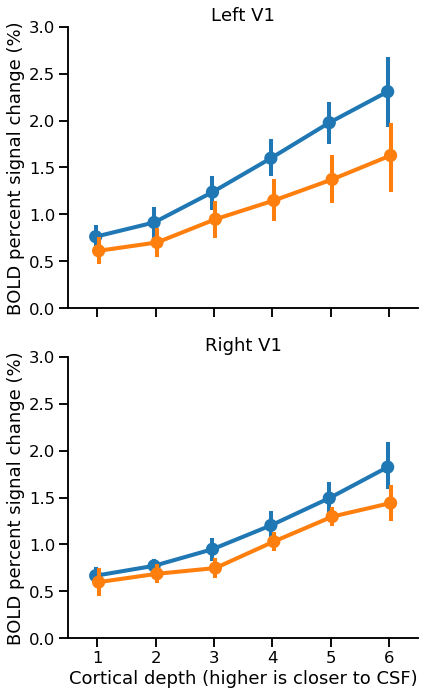

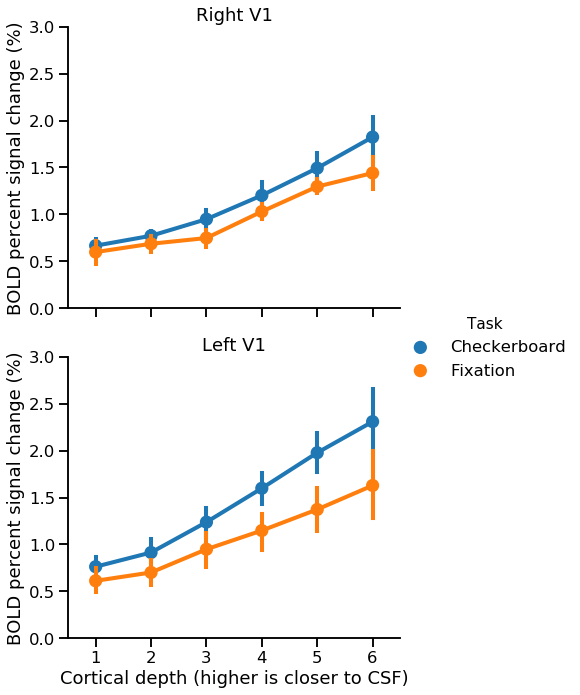

In [62]:
palette = sns.color_palette()
fac = sns.catplot('layer', 'psc', 
            data=psc_mean.reset_index(), row_order=['Left V1', 'Right V1'], legend=False,
            row='Mask', hue='Task', kind='point', ci=67, height=5., aspect=1.25, dodge=True,
                 palette=palette)

fac.set_ylabels('BOLD percent signal change (%)')
fac.set_titles('{row_name}')
fac.set_xlabels('Cortical depth (higher is closer to CSF)')
fac.set(ylim=(0, 3.))
plt.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/figure4/anova2_no_legend.pdf')

fac = sns.catplot('layer', 'psc', 
            data=psc_mean.reset_index(), col_order=['Left V1', 'Right V1'],
            row='Mask', hue='Task', kind='point', ci=67, height=5., aspect=1.25)

fac.set_ylabels('BOLD percent signal change (%)')
fac.set_titles('{row_name}')
fac.set_xlabels('Cortical depth (higher is closer to CSF)')
fac.set(ylim=(0, 3.))
plt.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/figure4/anova2.pdf')

In [19]:
from IPython.display import display
from statsmodels.stats.anova import AnovaRM

tmp = psc_mean.reset_index()
tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)
r = AnovaRM(tmp[tmp['mask'] == 'V1l'], 'psc', 'subject_', ['layer', 'task']).fit()

display(r.summary())


tmp = psc_mean.reset_index()
tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)
r = AnovaRM(tmp[tmp['mask'] == 'V1r'], 'psc', 'subject_', ['layer', 'task']).fit()

display(r.summary())

,F Value,Num DF,Den DF,Pr > F
layer,18.1791,5.0000,25.0000,0.0000
task,87.8590,1.0000,5.0000,0.0002
layer:task,7.7812,5.0000,25.0000,0.0002


,F Value,Num DF,Den DF,Pr > F
layer,11.8028,5.0000,30.0000,0.0000
task,3.7492,1.0000,6.0000,0.1010
layer:task,3.8770,5.0000,30.0000,0.0079


# Per ocularity

In [21]:
tmp = df.T
tmp.set_index(pd.Series((tmp.index.get_level_values('depth') * 6).astype(int) + 1, name='layer'), append=True, inplace=True, )

ocularity = tmp.index.get_level_values('t').map(lambda d: 'left' if d > 0 else 'right')

tmp.set_index(pd.Series(ocularity, name='ocularity'), append=True, inplace=True)

In [35]:
tmp.columns

MultiIndex(levels=[['bm', 'de', 'eo', 'ms', 'ns', 'tk', 'tr'], ['odc', 'odc1', 'odc2', 'odc3'], ['checkerboard', 'fixation'], ['left', 'right'], ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [39]:
for (subject, session), d in df.groupby(['subject', 'session'], axis=0):
    for run, d2 in d.groupby('run', axis=0):
        train = d.drop(run, level='run')
        ss.ttest_rel(d.loc[(slice(None), 'left'), 'psc'], d.loc[(slice(None), 'right'), 'psc'])
        

In [42]:
train.head()

mask                                             V1l                      \
voxel                                          1         2         3       
depth                                       0.933467  0.841109  0.829915   
t                                           2.634244 -3.346949 -6.985038   
subject session task         condition run                                 
tr      odc     checkerboard left      02        NaN       NaN       NaN   
                                       04        NaN       NaN       NaN   
                                       06        NaN       NaN       NaN   
                             right     02        NaN       NaN       NaN   
                                       04        NaN       NaN       NaN   

mask                                                                          \
voxel                                                        4                 
depth                                       0.974334      0.017858  0.829303   
t                                          -2.461321      2.369925 -5.040360   
subject session task         condition run                                     
tr      odc     checkerboard left      02        NaN -1.418949e-10       NaN   
                                       04        NaN  2.038358e-10       NaN   
                                       06        NaN  3.192519e-10       NaN   
                             right     02        NaN -3.333134e-10       NaN   
                                       04        NaN  1.710510e-10       NaN   

mask                                                                          \
voxel                                              5                   6       
depth                                           0.078260  0.824092  0.800928   
t                                              -2.549740  3.648918  5.735759   
subject session task         condition run                                     
tr      odc     checkerboard left      02  -5.929199e-08       NaN       NaN   
                                       04  -6.152567e-08       NaN       NaN   
                                       06  -2.271571e-08       NaN       NaN   
                             right     02  -4.390724e-08       NaN       NaN   
                                       04  -5.698033e-08       NaN       NaN   

mask                                                      ...       V1r  \
voxel                                              7      ...     22997   
depth                                           0.088016  ...  0.663892   
t                                              -2.446524  ... -3.632495   
subject session task         condition run                ...             
tr      odc     checkerboard left      02   1.579095e-09  ... -3.134323   
                                       04   1.350678e-09  ... -5.754024   
                                       06  -5.879281e-10  ... -0.515564   
                             right     02   1.392118e-09  ... -3.234501   
                                       04   1.172268e-09  ... -4.692748   

mask                                                                          \
voxel                                              23000     23063     23064   
depth                                           0.007766  0.254053  0.214759   
t                                               2.485123 -4.565762 -3.417627   
subject session task         condition run                                     
tr      odc     checkerboard left      02  -5.475723e-10 -2.121946  0.111965   
                                       04   2.175122e-08 -0.504697 -0.728793   
                                       06   1.786107e-08 -5.305978 -4.005842   
                             right     02   1.740097e-09 -2.097095  0.301188   
                                       04  -1.717638e-09  0.586102 -0.390636   

mask                                                                       \
voxel   

In [44]:
t, p = ss.ttest_rel(train.loc[(subject, session, slice(None), 'left')], train.loc[(subject, session, slice(None), 'right')])

/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/gdehol/miniconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Ttest_relResult(statistic=array([        nan,         nan,         nan, ..., -2.56755932,
       -2.20891299, -2.12280972]), pvalue=array([       nan,        nan,        nan, ..., 0.04247427, 0.06924687,
       0.07798011]))

In [28]:
tmp.stack('run')

subject                                                     bm            \
session                                                    odc             
task                                              checkerboard             
condition                                                 left     right   
mask voxel depth    t         layer ocularity run                          
V1l  1     0.933467  2.634244 6     left      02           NaN       NaN   
                                              03     -1.490367 -2.259468   
                                              04           NaN       NaN   
                                              05     -0.223744  0.113792   
                                              06           NaN       NaN   
                                              07     -0.443787 -1.847721   
                                              08           NaN       NaN   
                                              09     -0.398370 -2.091186   
     2     0.841109 -3.346949 6     right     02           NaN       NaN   
                                              03     -1.597949  0.286086   
                                              04           NaN       NaN   
                                              05     -0.140879  2.597206   
                                              06           NaN       NaN   
                                              07     -0.796435  0.347544   
                                              08           NaN       NaN   
                                              09     -0.310999 -0.358402   
     3     0.829915 -6.985038 5     right     02           NaN       NaN   
                                              03      0.290964  2.629779   
                                              04           NaN       NaN   
                                              05      0.547018  3.330269   
                                              06           NaN       NaN   
                                              07      0.509491  2.244587   
                                              08           NaN       NaN   
                                              09     -1.129394  0.347524   
           0.974334 -2.461321 6     right     01           NaN       NaN   
                                              02           NaN       NaN   
                                              03           NaN       NaN   
                                              05           NaN       NaN   
                                              06           NaN       NaN   
                                              07           NaN       NaN   
...                                                        ...       ...   
V1r  23134 0.844055  3.600604 6     left      03           NaN       NaN   
                                              04           NaN       NaN   
                                              05           NaN       NaN   
                                              06           NaN       NaN   
                                              07           NaN       NaN   
                                              08           NaN       NaN   
     23179 0.734973 -2.406374 5     right     01           NaN       NaN   
                                              02           NaN       NaN   
                                              03           NaN       NaN   
                                              04           NaN       NaN   
                                              05           NaN       NaN   
                                              06           NaN       NaN   
                                              07           NaN       NaN   
                                              08           NaN       NaN   
     23192 0.704786 -2.421583 5     right     01           NaN       NaN   
                                              02           NaN       NaN   
                                              03

In [1130]:
tmp = tmp.groupby(['mask', 'layer', 'ocularity']).mean().T

In [1131]:
psc = tmp.stack(['mask', 'layer', 'ocularity']).to_frame('psc')

In [1132]:
psc_mean = psc.groupby(['subject', 'session', 'mask', 'task', 'layer', 'condition', 'ocularity']).mean()

In [1133]:
psc_mean = psc_mean.drop([('bm', 'odc', 'V1l'), ('ns')])

In [1134]:
psc_mean['stimulated'] = psc_mean.index.get_level_values('ocularity') == psc_mean.index.get_level_values('condition')

In [1135]:
psc_mean['stimulated_'] = psc_mean.stimulated.map({True:'Stimulated', False:'Unstimulated'})

In [1136]:
psc_mean = psc_mean.reset_index().groupby(['subject', 'session' ,'mask', 'task', 'layer', 'stimulated_'], as_index=False).mean()

In [1137]:
psc_mean['Condition'] = psc_mean.apply(lambda row: '{} ({})'.format(row.task.capitalize(), row.stimulated_), 1)

In [1138]:
psc_mean['Mask'] = psc_mean['mask'].map({'V1l':'Left V1', 'V1r':'Right V1'})

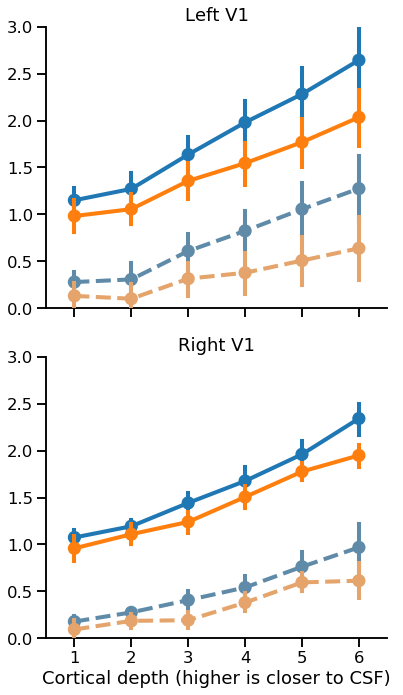

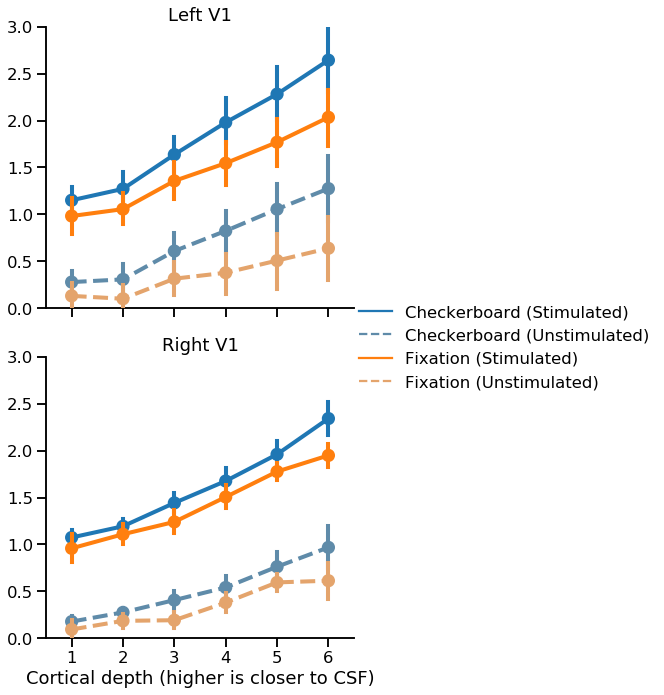

In [1155]:
palette = np.repeat(sns.color_palette()[:2], 2, 0)

palette[1] = sns.desaturate(palette[1], .4)
palette[3] = sns.desaturate(palette[3], .4)

palette[1] *= 1.25
palette[3] *= 1.25
fac = sns.catplot('layer', 'psc', 
            data=psc_mean.reset_index(),
            linestyles=['-', '--', '-', '--'],
row_order=['Left V1', 'Right V1'],            hue_order=['Checkerboard (Stimulated)', 'Checkerboard (Unstimulated)',
       'Fixation (Stimulated)', 'Fixation (Unstimulated)'], height=5., aspect=1.25,
            row='Mask', hue='Condition', kind='point', ci=67, 
            palette=palette, legend=False)

h = plt.gca().get_lines()
# lg = plt.legend(handles=h, labels=['YOUR Labels List'], loc='best')

fac._legend_data['Checkerboard (Stimulated)'] = Line2D([0], [0], color=palette[0])
fac._legend_data['Checkerboard (Unstimulated)'] = Line2D([0], [0], color=palette[1], ls='--')
fac._legend_data['Fixation (Stimulated)'] = Line2D([0], [0], color=palette[2])
fac._legend_data['Fixation (Unstimulated)'] = Line2D([0], [0], color=palette[3], ls='--')

# fac.set_ylabels('BOLD percent signal change (%)')
fac.set_ylabels('')
fac.set_titles('{row_name}')
fac.set_xlabels('Cortical depth (higher is closer to CSF)')
fac.set(ylim=(0, 3.))

plt.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/figure4/anova3_no_legend.pdf')

fac = sns.catplot('layer', 'psc', 
            data=psc_mean.reset_index(),
            linestyles=['-', '--', '-', '--'],
                  row_order=['Left V1', 'Right V1'],
            hue_order=['Checkerboard (Stimulated)', 'Checkerboard (Unstimulated)',
       'Fixation (Stimulated)', 'Fixation (Unstimulated)'], height=5., aspect=1.25,
            row='Mask', hue='Condition', kind='point', ci=67, 
            palette=palette, legend=False)

h = plt.gca().get_lines()
# lg = plt.legend(handles=h, labels=['YOUR Labels List'], loc='best')

fac._legend_data['Checkerboard (Stimulated)'] = Line2D([0], [0], color=palette[0])
fac._legend_data['Checkerboard (Unstimulated)'] = Line2D([0], [0], color=palette[1], ls='--')
fac._legend_data['Fixation (Stimulated)'] = Line2D([0], [0], color=palette[2])
fac._legend_data['Fixation (Unstimulated)'] = Line2D([0], [0], color=palette[3], ls='--')
    
fac.add_legend()

# fac.set_ylabels('BOLD percent signal change (%)')
fac.set_ylabels('')
fac.set_titles('{row_name}')
fac.set_xlabels('Cortical depth (higher is closer to CSF)')
fac.set(ylim=(0, 3.))

plt.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/figure4/anova3_legend.pdf')

In [1156]:
from statsmodels.stats.anova import AnovaRM

tmp = psc_mean.reset_index()
tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)
r = AnovaRM(tmp[tmp['mask'] == 'V1l'], 'psc', 'subject_', ['layer', 'stimulated'], aggregate_func='mean').fit()

display(r.summary())


tmp = psc_mean.reset_index()
tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)
r = AnovaRM(tmp[tmp['mask'] == 'V1r'], 'psc', 'subject_', ['layer', 'stimulated'], aggregate_func='mean').fit()

display(r.summary())

,Num DF,Den DF,F Value,Pr > F
layer,5.0000,25.0000,12.3752,0.0000
stimulated,1.0000,5.0000,425.1190,0.0000
layer:stimulated,5.0000,25.0000,23.5331,0.0000


,Num DF,Den DF,F Value,Pr > F
layer,5.0000,30.0000,11.0112,0.0000
stimulated,1.0000,6.0000,353.7161,0.0000
layer:stimulated,5.0000,30.0000,20.9975,0.0000


In [1157]:
def fit_layer_psc_ols(d):
    
    X = np.ones((d.shape[0], 2))
    X[:, 1] = d['layer']
    
    beta, resid, _, _ = np.linalg.lstsq(X, d['psc'])
    r2 = 1 - ((X.dot(beta) - d['psc']).var() / d['psc'].var())
    
    return pd.Series({'Intercept':beta[0], 'Slope':beta[1], 'r2':r2}, name='parameter')

In [1158]:
intercept_slopes = psc_mean.reset_index().groupby(['subject', 'session', 'mask', 'task', 'stimulated']).apply(fit_layer_psc_ols)
intercept_slopes = intercept_slopes.stack().to_frame('value').reset_index()

/Users/gdehol/miniconda3/envs/pycortex/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [1159]:
intercept_slopes['stimulated_'] = intercept_slopes.stimulated.map({True:'Stimulated', False:'Unstimulated'})

In [1160]:
intercept_slopes['Condition'] = intercept_slopes.apply(lambda row: '{} ({})'.format(row.task.capitalize(), row.stimulated_), 1)

In [1161]:
intercept_slopes['Mask'] = intercept_slopes['mask'].map({'V1l':'Left V1', 'V1r':'Right V1'})

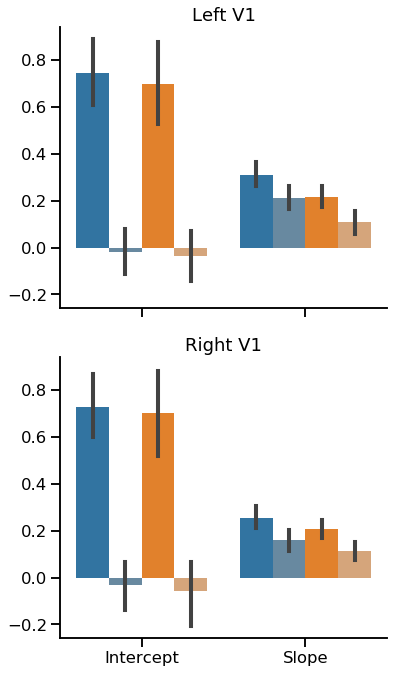

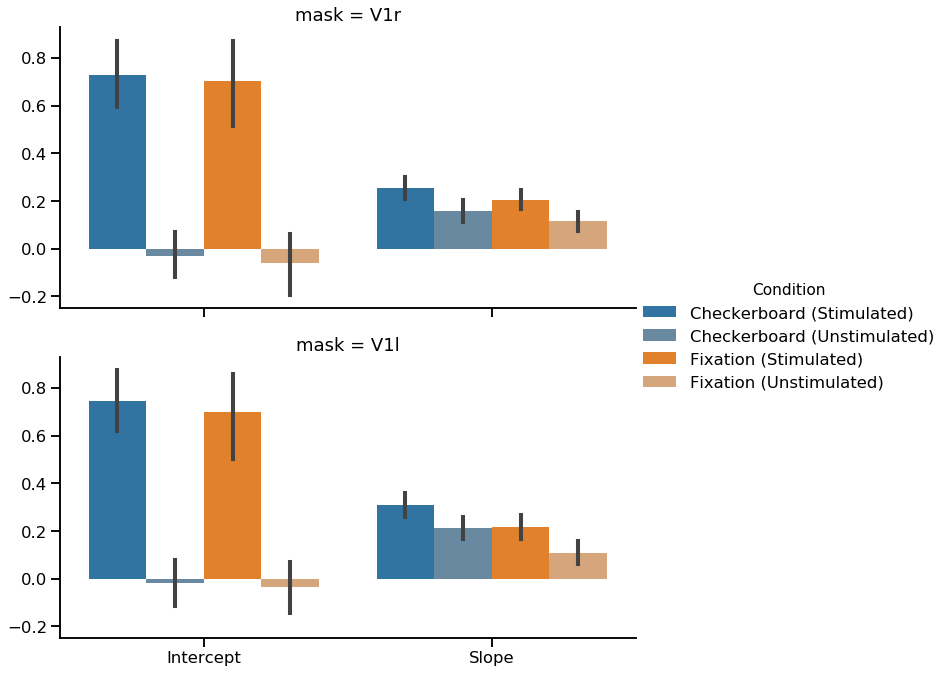

In [1162]:
fac = sns.catplot('parameter', 'value', 'Condition', row='Mask', data=intercept_slopes, kind='bar',
            hue_order=['Checkerboard (Stimulated)', 'Checkerboard (Unstimulated)',
       'Fixation (Stimulated)', 'Fixation (Unstimulated)'], height=5.,
          row_order=['Left V1', 'Right V1'],
                  order=['Intercept', 'Slope'],
            palette=list(palette), ci=67, aspect=1.25, legend=False)

fac.set_xlabels('')
fac.set_ylabels('')
fac.set_titles('{row_name}')

fac.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/figure4/pars.pdf')


fac = sns.catplot('parameter', 'value', 'Condition', row='mask', data=intercept_slopes, kind='bar',
            hue_order=['Checkerboard (Stimulated)', 'Checkerboard (Unstimulated)',
       'Fixation (Stimulated)', 'Fixation (Unstimulated)'],
            order=['Intercept', 'Slope'],
            palette=list(palette), ci=67, aspect=2., legend=True)

fac.set_xlabels('')
fac.set_ylabels('')

fac.savefig('/Users/gdehol/Dropbox/Science/7t_binocular/paper/figures/figure4/pars_legend.pdf')

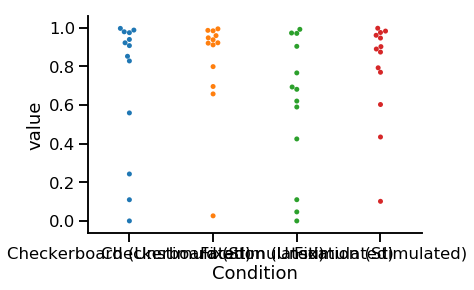

In [1151]:
sns.swarmplot('Condition', 'value', data=intercept_slopes[intercept_slopes['parameter'] == 'r2'],)
sns.despine()

In [1152]:
psc_mean['subject_'] = psc_mean.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)

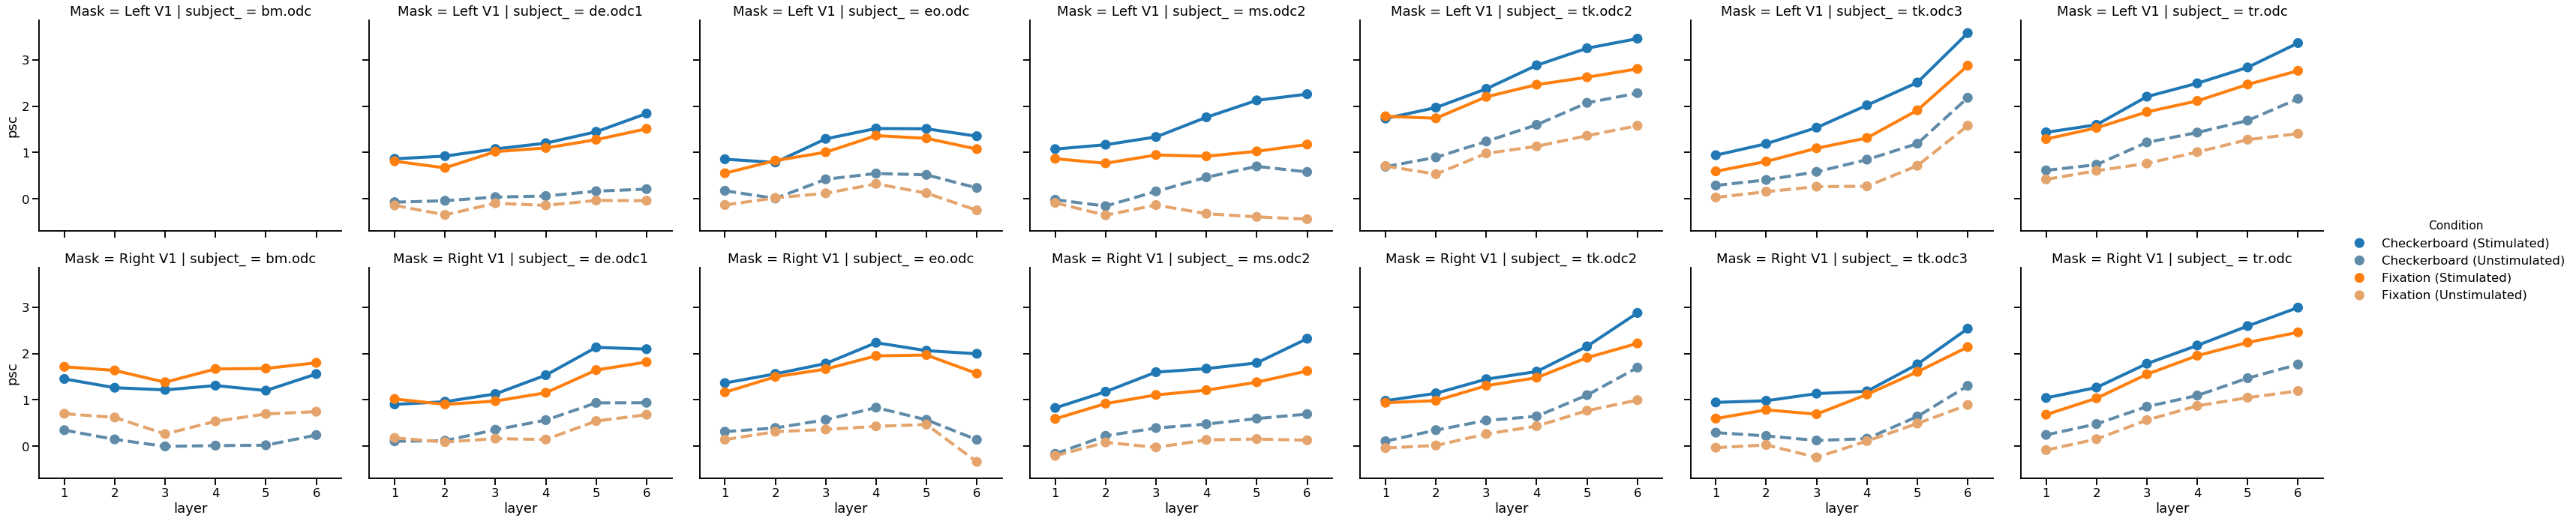

In [1154]:
palette = np.repeat(sns.color_palette()[:2], 2, 0)

palette[1] = sns.desaturate(palette[1], .4)
palette[3] = sns.desaturate(palette[3], .4)

palette[1] *= 1.25
palette[3] *= 1.25
fac = sns.catplot('layer', 'psc', 
            data=psc_mean.reset_index(),
            linestyles=['-', '--', '-', '--'],
row_order=['Left V1', 'Right V1'],            hue_order=['Checkerboard (Stimulated)', 'Checkerboard (Unstimulated)',
       'Fixation (Stimulated)', 'Fixation (Unstimulated)'], height=5., aspect=1.25,
            row='Mask', hue='Condition', kind='point', ci=67, 
                  col='subject_',
            palette=palette, legend=True)

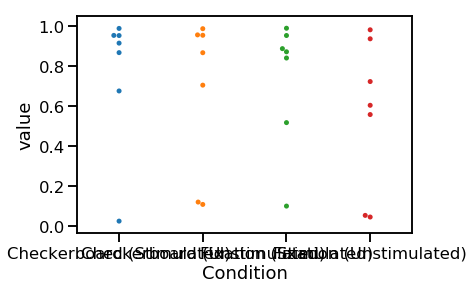

In [1128]:
tmp = intercept_slopes[intercept_slopes.parameter == 'r2'].pivot_table(index=['subject', 'session', 'Condition'], values='value').reset_index()
sns.swarmplot('Condition', 'value', data=tmp)

## Effect of condition on intercept parameter

In [748]:
tmp = intercept_slopes[intercept_slopes.parameter == 'intercept']
tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)
r = AnovaRM(tmp[tmp['mask'] == 'V1l'], 'value', 'subject_', ['task', 'stimulated']).fit()

display(r.summary())


tmp = intercept_slopes[intercept_slopes.parameter == 'intercept']
tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)
r = AnovaRM(tmp[tmp['mask'] == 'V1r'], 'value', 'subject_', ['task', 'stimulated']).fit()

display(r.summary())

/Users/gdehol/miniconda3/envs/pycortex/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Num DF,Den DF,F Value,Pr > F
task,1.0000,5.0000,0.3522,0.5787
stimulated,1.0000,5.0000,65.1978,0.0005
task:stimulated,1.0000,5.0000,0.3463,0.5818


/Users/gdehol/miniconda3/envs/pycortex/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Num DF,Den DF,F Value,Pr > F
task,1.0000,6.0000,0.1296,0.7311
stimulated,1.0000,6.0000,149.3012,0.0000
task:stimulated,1.0000,6.0000,0.0007,0.9794


## Effect of condition on slope parameter

In [749]:
tmp = intercept_slopes[intercept_slopes.parameter == 'slope']
tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)
r = AnovaRM(tmp[tmp['mask'] == 'V1l'], 'value', 'subject_', ['task', 'stimulated']).fit()

display(r.summary())

tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)
r = AnovaRM(tmp[tmp['mask'] == 'V1r'], 'value', 'subject_', ['task', 'stimulated']).fit()

display(r.summary())

/Users/gdehol/miniconda3/envs/pycortex/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Num DF,Den DF,F Value,Pr > F
task,1.0000,5.0000,11.8513,0.0184
stimulated,1.0000,5.0000,35.4010,0.0019
task:stimulated,1.0000,5.0000,1.4101,0.2884


/Users/gdehol/miniconda3/envs/pycortex/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Num DF,Den DF,F Value,Pr > F
task,1.0000,6.0000,6.3440,0.0454
stimulated,1.0000,6.0000,31.0241,0.0014
task:stimulated,1.0000,6.0000,0.2224,0.6539


## Threeway ANOVA

In [763]:
from statsmodels.stats.anova import AnovaRM

tmp = psc_mean.groupby(['subject', 'session', 'mask', 'layer', 'task', 'stimulated']).mean().reset_index()
tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)
r = AnovaRM(tmp[tmp['mask'] == 'V1l'], 'psc', 'subject_', ['layer', 'task', 'stimulated']).fit()

display(r.summary())


tmp['subject_'] = tmp.apply(lambda row: '{subject}.{session}'.format(**row.to_dict()), axis=1)
r = AnovaRM(tmp[tmp['mask'] == 'V1r'], 'psc', 'subject_', ['layer', 'task', 'stimulated']).fit()

display(r.summary())

,Num DF,Den DF,F Value,Pr > F
layer,5.0000,25.0000,12.3752,0.0000
task,1.0000,5.0000,32.6708,0.0023
stimulated,1.0000,5.0000,425.1190,0.0000
layer:task,5.0000,25.0000,7.3477,0.0002
layer:stimulated,5.0000,25.0000,23.5331,0.0000
task:stimulated,1.0000,5.0000,0.0658,0.8078
layer:task:stimulated,5.0000,25.0000,0.7734,0.5780


,Num DF,Den DF,F Value,Pr > F
layer,5.0000,30.0000,11.0112,0.0000
task,1.0000,6.0000,3.5198,0.1097
stimulated,1.0000,6.0000,353.7161,0.0000
layer:task,5.0000,30.0000,3.9020,0.0076
layer:stimulated,5.0000,30.0000,20.9975,0.0000
task:stimulated,1.0000,6.0000,0.1493,0.7126
layer:task:stimulated,5.0000,30.0000,0.8708,0.5122


In [751]:
stimulation_effect = psc_mean.reset_index().pivot_table(index=psc_mean.index.names[:-1], columns='stimulated', values='psc')

In [752]:
stimulation_effect = (stimulation_effect[True] - stimulation_effect[False]).to_frame('psc')

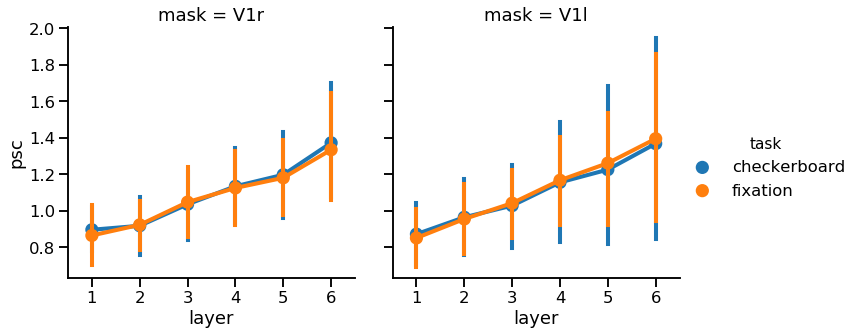

In [753]:
sns.catplot('layer', 'psc', 
            data=stimulation_effect.reset_index(),
            col='mask', hue='task', kind='point', ci=67)

In [754]:
task_effect = psc_mean.reset_index().pivot_table(index=['subject', 'session', 'mask', 'layer', 'condition', 'ocularity', 'stimulated'], columns='task', values='psc')

In [755]:
task_effect = (task_effect['checkerboard'] - task_effect['fixation']).to_frame('psc')

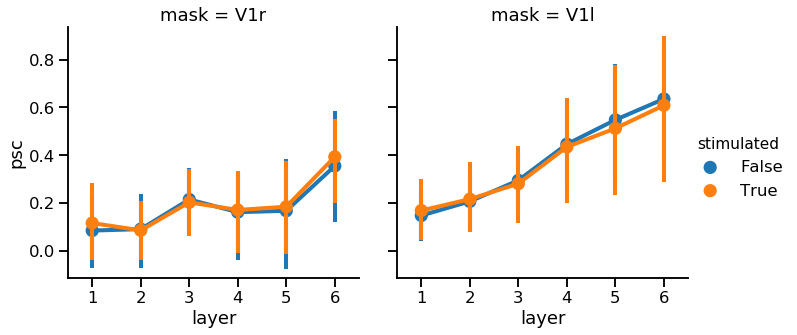

In [756]:
sns.catplot('layer', 'psc', 
            data=task_effect.reset_index(),
            col='mask', hue='stimulated', kind='point', ci=95)